## NLP Ontology for related job roles & skills using OpenSkills Taxonomy

overview for this project can be found in the following GitHub repository:  
https://github.com/talentrics/Project_proposal_2020/blob/master/README.md

### method

- download OpenSkills Ontology for specific job role (e.g. 'Cardiovascular Technician')
- using API get json file for job title, description, and related job titles & skills
- using NLTK, clean the text and tokenize the keywords to find the most frequent
- use these words as a cross reference to identify candidates with knowledge & skill

In [1]:
import pandas as pd
import urllib.request
import json
import ast
from pandas.io.json import json_normalize
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer 
from nltk.tokenize import word_tokenize
stop_words = set(stopwords.words('english'))
from collections import Counter
import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/talentrics/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
# open list of all jobs with uuid related to 'Cardiovascular Technologist'
# available API found at http://api.dataatwork.org/v1/spec/

with urllib.request.urlopen("http://api.dataatwork.org/v1/jobs/29-2031.00") as url:
    jobs = json.loads(url.read().decode())
    print(jobs)

{'uuid': 'ad9812f91f3670f1ab3420c43821eafe', 'onet_soc_code': '29-2031.00', 'title': 'Cardiovascular Technologists and Technicians', 'description': 'Conduct tests on pulmonary or cardiovascular systems of patients for diagnostic purposes. May conduct or assist in electrocardiograms, cardiac catheterizations, pulmonary functions, lung capacity, and similar tests. Includes vascular technologists.', 'related_job_titles': [{'uuid': 'a1e4a57509a7c77e8d02d04866a5b889', 'title': 'ARRT Technologist (American Registry of Radiologic Technologists Technologist)'}, {'uuid': 'b6c4f4d7676e9c1e4c2bca5fab118997', 'title': 'Cardiac Catheterization Laboratory Technologist'}, {'uuid': '6de88736305bc66381b555be2c8c79e8', 'title': 'Cardiac Catheterization Special Procedures Technologist'}, {'uuid': 'd3afc1d82c5d301c132c17b681637de0', 'title': 'Cardiac Catheterization Technician'}, {'uuid': '58d470fce6a6255d9df458171baefcd1', 'title': 'Cardiac Catheterization Technologist'}, {'uuid': 'febb6f407269952298cdce

In [3]:
print(stop_words)

{'during', 'not', 'am', 'until', "doesn't", 'on', 'them', 'above', 'it', 'o', 'down', 'hers', 'own', 'ma', 'we', 'off', 'to', "you'll", 'about', 'most', 'again', "hasn't", 'were', 'a', 'doesn', 'wouldn', 'from', 'the', 'their', 'now', 'shan', 'shouldn', 'and', 'only', 'so', 'when', 'ours', 'my', 'over', 'then', 'he', 'was', "should've", 'those', "hadn't", 'isn', 'out', 'been', "needn't", 'theirs', 'by', 'myself', 'have', 'there', 'should', "couldn't", 'other', 'more', 'wasn', 'because', 'hadn', "wouldn't", "didn't", 'no', 'm', 'does', 'needn', 'her', "it's", 'mightn', "aren't", 'under', 'just', 'very', 'didn', 'here', 'how', 'into', 'is', 'i', 'what', 'further', 'will', "isn't", 's', 'its', "mustn't", 'me', 'that', 'aren', 'such', 'themselves', 'did', 'has', 'being', 'any', 'whom', 'himself', 'these', 'through', 'yourself', 'ourselves', 'him', 'or', 'all', 'who', "haven't", 'while', 'up', "weren't", 'having', 'you', 'as', 'y', 'll', 'once', 'some', 'are', 'they', 've', 'against', "you'

In [4]:
def remove_sw(x):
    x = x.split(' ')
    return  ' '.join(z for z in x if z not in stop_words)

tech_words = ['technician','technician)','tech','technologist','technologist)']

def remove_techwords(x):
    x = x.split(' ')
    return  ' '.join(z for z in x if z not in tech_words)

In [5]:
# create dataframe with added column for clean text
roles_data = json_normalize(data = jobs['related_job_titles'])
roles_data['clean_title'] = roles_data['title']
roles_data['clean_title'] = [word.lower() for word in roles_data['clean_title']]
roles_data['clean_title'] = roles_data['clean_title'].apply(remove_sw)
roles_data['clean_title'] = roles_data['clean_title'].apply(remove_techwords)
roles_data.head(5)

,title,uuid,clean_title
0,ARRT Technologist (American Registry of Radiol...,a1e4a57509a7c77e8d02d04866a5b889,arrt (american registry radiologic technologists
1,Cardiac Catheterization Laboratory Technologist,b6c4f4d7676e9c1e4c2bca5fab118997,cardiac catheterization laboratory
2,Cardiac Catheterization Special Procedures Tec...,6de88736305bc66381b555be2c8c79e8,cardiac catheterization special procedures
3,Cardiac Catheterization Technician,d3afc1d82c5d301c132c17b681637de0,cardiac catheterization
4,Cardiac Catheterization Technologist,58d470fce6a6255d9df458171baefcd1,cardiac catheterization


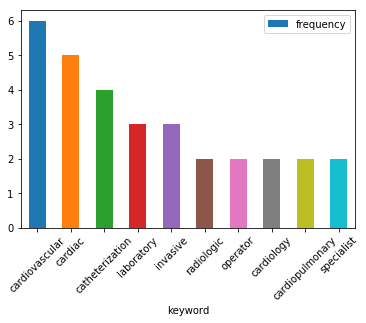

In [6]:
# graph the keywords by frequency for all related job titles
results = Counter()
roles_data['clean_title'].str.lower().str.split().apply(results.update)
results = results.most_common(10)
df_results = pd.DataFrame(results)
df_results.columns = ['keyword','frequency']
df_results.plot.bar(x=0, y=1, rot=45)

In [7]:
# api request for skills data related to the first job 'cardiovascular technologists and technicians'
with urllib.request.urlopen(
    "http://api.dataatwork.org/v1/jobs/ad9812f91f3670f1ab3420c43821eafe/related_skills") as url:
    data_test = json.loads(url.read().decode())
    print(data_test)

{'job_uuid': 'ad9812f91f3670f1ab3420c43821eafe', 'job_title': 'Cardiovascular Technologists and Technicians', 'normalized_job_title': 'cardiovascular technologists and technicians', 'skills': [{'skill_uuid': 'b4595c0fed78ae278f4cb5eff45bba24', 'skill_name': 'customer and personal service', 'skill_type': 'knowledge', 'description': 'knowledge of principles and processes for providing customer and personal services. this includes customer needs assessment, meeting quality standards for services, and evaluation of customer satisfaction.', 'normalized_skill_name': 'customer and personal service', 'importance': 4.29, 'level': 5.0}, {'skill_uuid': 'd66da8698b5a37186143205b78c73f7d', 'skill_name': 'problem sensitivity', 'skill_type': 'ability', 'description': 'the ability to tell when something is wrong or is likely to go wrong. it does not involve solving the problem, only recognizing there is a problem.', 'normalized_skill_name': 'problem sensitivity', 'importance': 4.12, 'level': 4.12}, {'

In [8]:
skills_data = json_normalize(data=data_test['skills'])
skills_data.head(10)

,description,importance,level,normalized_skill_name,skill_name,skill_type,skill_uuid
0,knowledge of principles and processes for prov...,4.29,5.00,customer and personal service,customer and personal service,knowledge,b4595c0fed78ae278f4cb5eff45bba24
1,the ability to tell when something is wrong or...,4.12,4.12,problem sensitivity,problem sensitivity,ability,d66da8698b5a37186143205b78c73f7d
2,the ability to listen to and understand inform...,4.00,4.00,oral comprehension,oral comprehension,ability,0194023051cb666af3d2c4761d894957
3,the ability to communicate information and ide...,4.00,4.00,oral expression,oral expression,ability,d3dfdcdd96e1a57645c3b1728c640ee2
4,the ability to see details at close range (wit...,4.00,3.62,near vision,near vision,ability,40d7109449763956696e4e2ef537a281
5,knowledge of the information and techniques ne...,3.89,4.06,medicine and dentistry,medicine and dentistry,knowledge,16b3f6e445161762cd3fdf593c1d373a
6,giving full attention to what other people are...,3.88,3.88,active listening,active listening,skill,a636cb69257dcec699bce4f023a05126
7,knowledge of the structure and content of the ...,3.87,3.44,english language,english language,knowledge,500018df958f2b9f8b387cf5637a0a04
8,talking to others to convey information effect...,3.75,3.62,speaking,speaking,skill,d1715efc5a67ac1c988152b8136e3dfa
9,using logic and reasoning to identify the stre...,3.75,3.75,critical thinking,critical thinking,skill,20784bf09c9fe614603ad635e6093ede


In [9]:
skills_data['clean_text'] = skills_data['description'].apply(remove_sw)

In [10]:
skills_data.head(10)

,description,importance,level,normalized_skill_name,skill_name,skill_type,skill_uuid,clean_text
0,knowledge of principles and processes for prov...,4.29,5.00,customer and personal service,customer and personal service,knowledge,b4595c0fed78ae278f4cb5eff45bba24,knowledge principles processes providing custo...
1,the ability to tell when something is wrong or...,4.12,4.12,problem sensitivity,problem sensitivity,ability,d66da8698b5a37186143205b78c73f7d,ability tell something wrong likely go wrong. ...
2,the ability to listen to and understand inform...,4.00,4.00,oral comprehension,oral comprehension,ability,0194023051cb666af3d2c4761d894957,ability listen understand information ideas pr...
3,the ability to communicate information and ide...,4.00,4.00,oral expression,oral expression,ability,d3dfdcdd96e1a57645c3b1728c640ee2,ability communicate information ideas speaking...
4,the ability to see details at close range (wit...,4.00,3.62,near vision,near vision,ability,40d7109449763956696e4e2ef537a281,ability see details close range (within feet o...
5,knowledge of the information and techniques ne...,3.89,4.06,medicine and dentistry,medicine and dentistry,knowledge,16b3f6e445161762cd3fdf593c1d373a,knowledge information techniques needed diagno...
6,giving full attention to what other people are...,3.88,3.88,active listening,active listening,skill,a636cb69257dcec699bce4f023a05126,"giving full attention people saying, taking ti..."
7,knowledge of the structure and content of the ...,3.87,3.44,english language,english language,knowledge,500018df958f2b9f8b387cf5637a0a04,knowledge structure content english language i...
8,talking to others to convey information effect...,3.75,3.62,speaking,speaking,skill,d1715efc5a67ac1c988152b8136e3dfa,talking others convey information effectively.
9,using logic and reasoning to identify the stre...,3.75,3.75,critical thinking,critical thinking,skill,20784bf09c9fe614603ad635e6093ede,using logic reasoning identify strengths weakn...


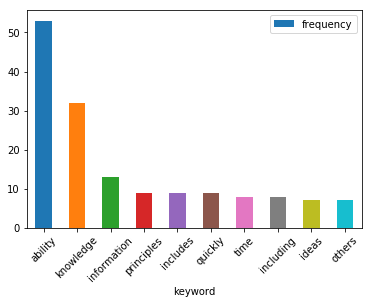

In [11]:
results_2 = Counter()
skills_data['clean_text'].str.lower().str.split().apply(results_2.update)
results_2 = results_2.most_common(10)
df_results_2 = pd.DataFrame(results_2)
df_results_2.columns = ['keyword','frequency']
df_results_2.plot.bar(x=0, y=1, rot=45)